In [12]:
import pandas as pd

df = pd.read_csv("../data/raw_data/Open_Data.csv")
df

,P_Num,Gender,Age,Ethnicity,Education,OCD_selfReport,SymptomCourse,TreatmentPresence,Binary_med,Num_Med,...,HADS_A5,HADS_A6,HADS_A7,HADS_D1,HADS_D2,HADS_D3,HADS_D4,HADS_D5,HADS_D6,HADS_D7
0,1,1.0,35.0,4.0,1.0,3,NaN,NaN,NaN,NaN,...,3.0,1.0,3.0,2.0,3.0,0.0,1.0,2.0,1.0,2.0
1,2,1.0,23.0,4.0,1.0,1,4.0,1.0,2.0,NaN,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,1.0,22.0,4.0,1.0,1,2.0,1.0,2.0,NaN,...,3.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,1.0,21.0,4.0,1.0,1,2.0,1.0,1.0,1.0,...,3.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0
4,5,1.0,18.0,4.0,1.0,1,4.0,1.0,1.0,1.0,...,3.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,1.0,23.0,4.0,1.0,2,1.0,3.0,NaN,NaN,...,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
386,387,2.0,42.0,4.0,1.0,2,4.0,4.0,NaN,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
387,388,2.0,27.0,1.0,1.0,2,4.0,2.0,2.0,NaN,...,3.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0
388,389,3.0,40.0,3.0,1.0,3,NaN,NaN,NaN,NaN,...,1.0,0.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0,2.0


we only care about:
1. individuals who said the either have OCD and diagnosed or individuals who said the have OCD OCD but not diagnosed
2. individuals who completed major scales related questions

In [13]:
cols_to_check = [
    c
    for c in df.columns
    if c
    not in [
        "SymptomsChange",
        "Bin_otherTreat",
        "Bin_Therapy",
        "Num_Med",
        "Binary_med",
        "Treatment_Presence",
        "SymptomsCourse",
    ]
]
df_clean = df.dropna(subset=cols_to_check)

the columns to check list is a list the list that has the columns that we can deal with empty values in them

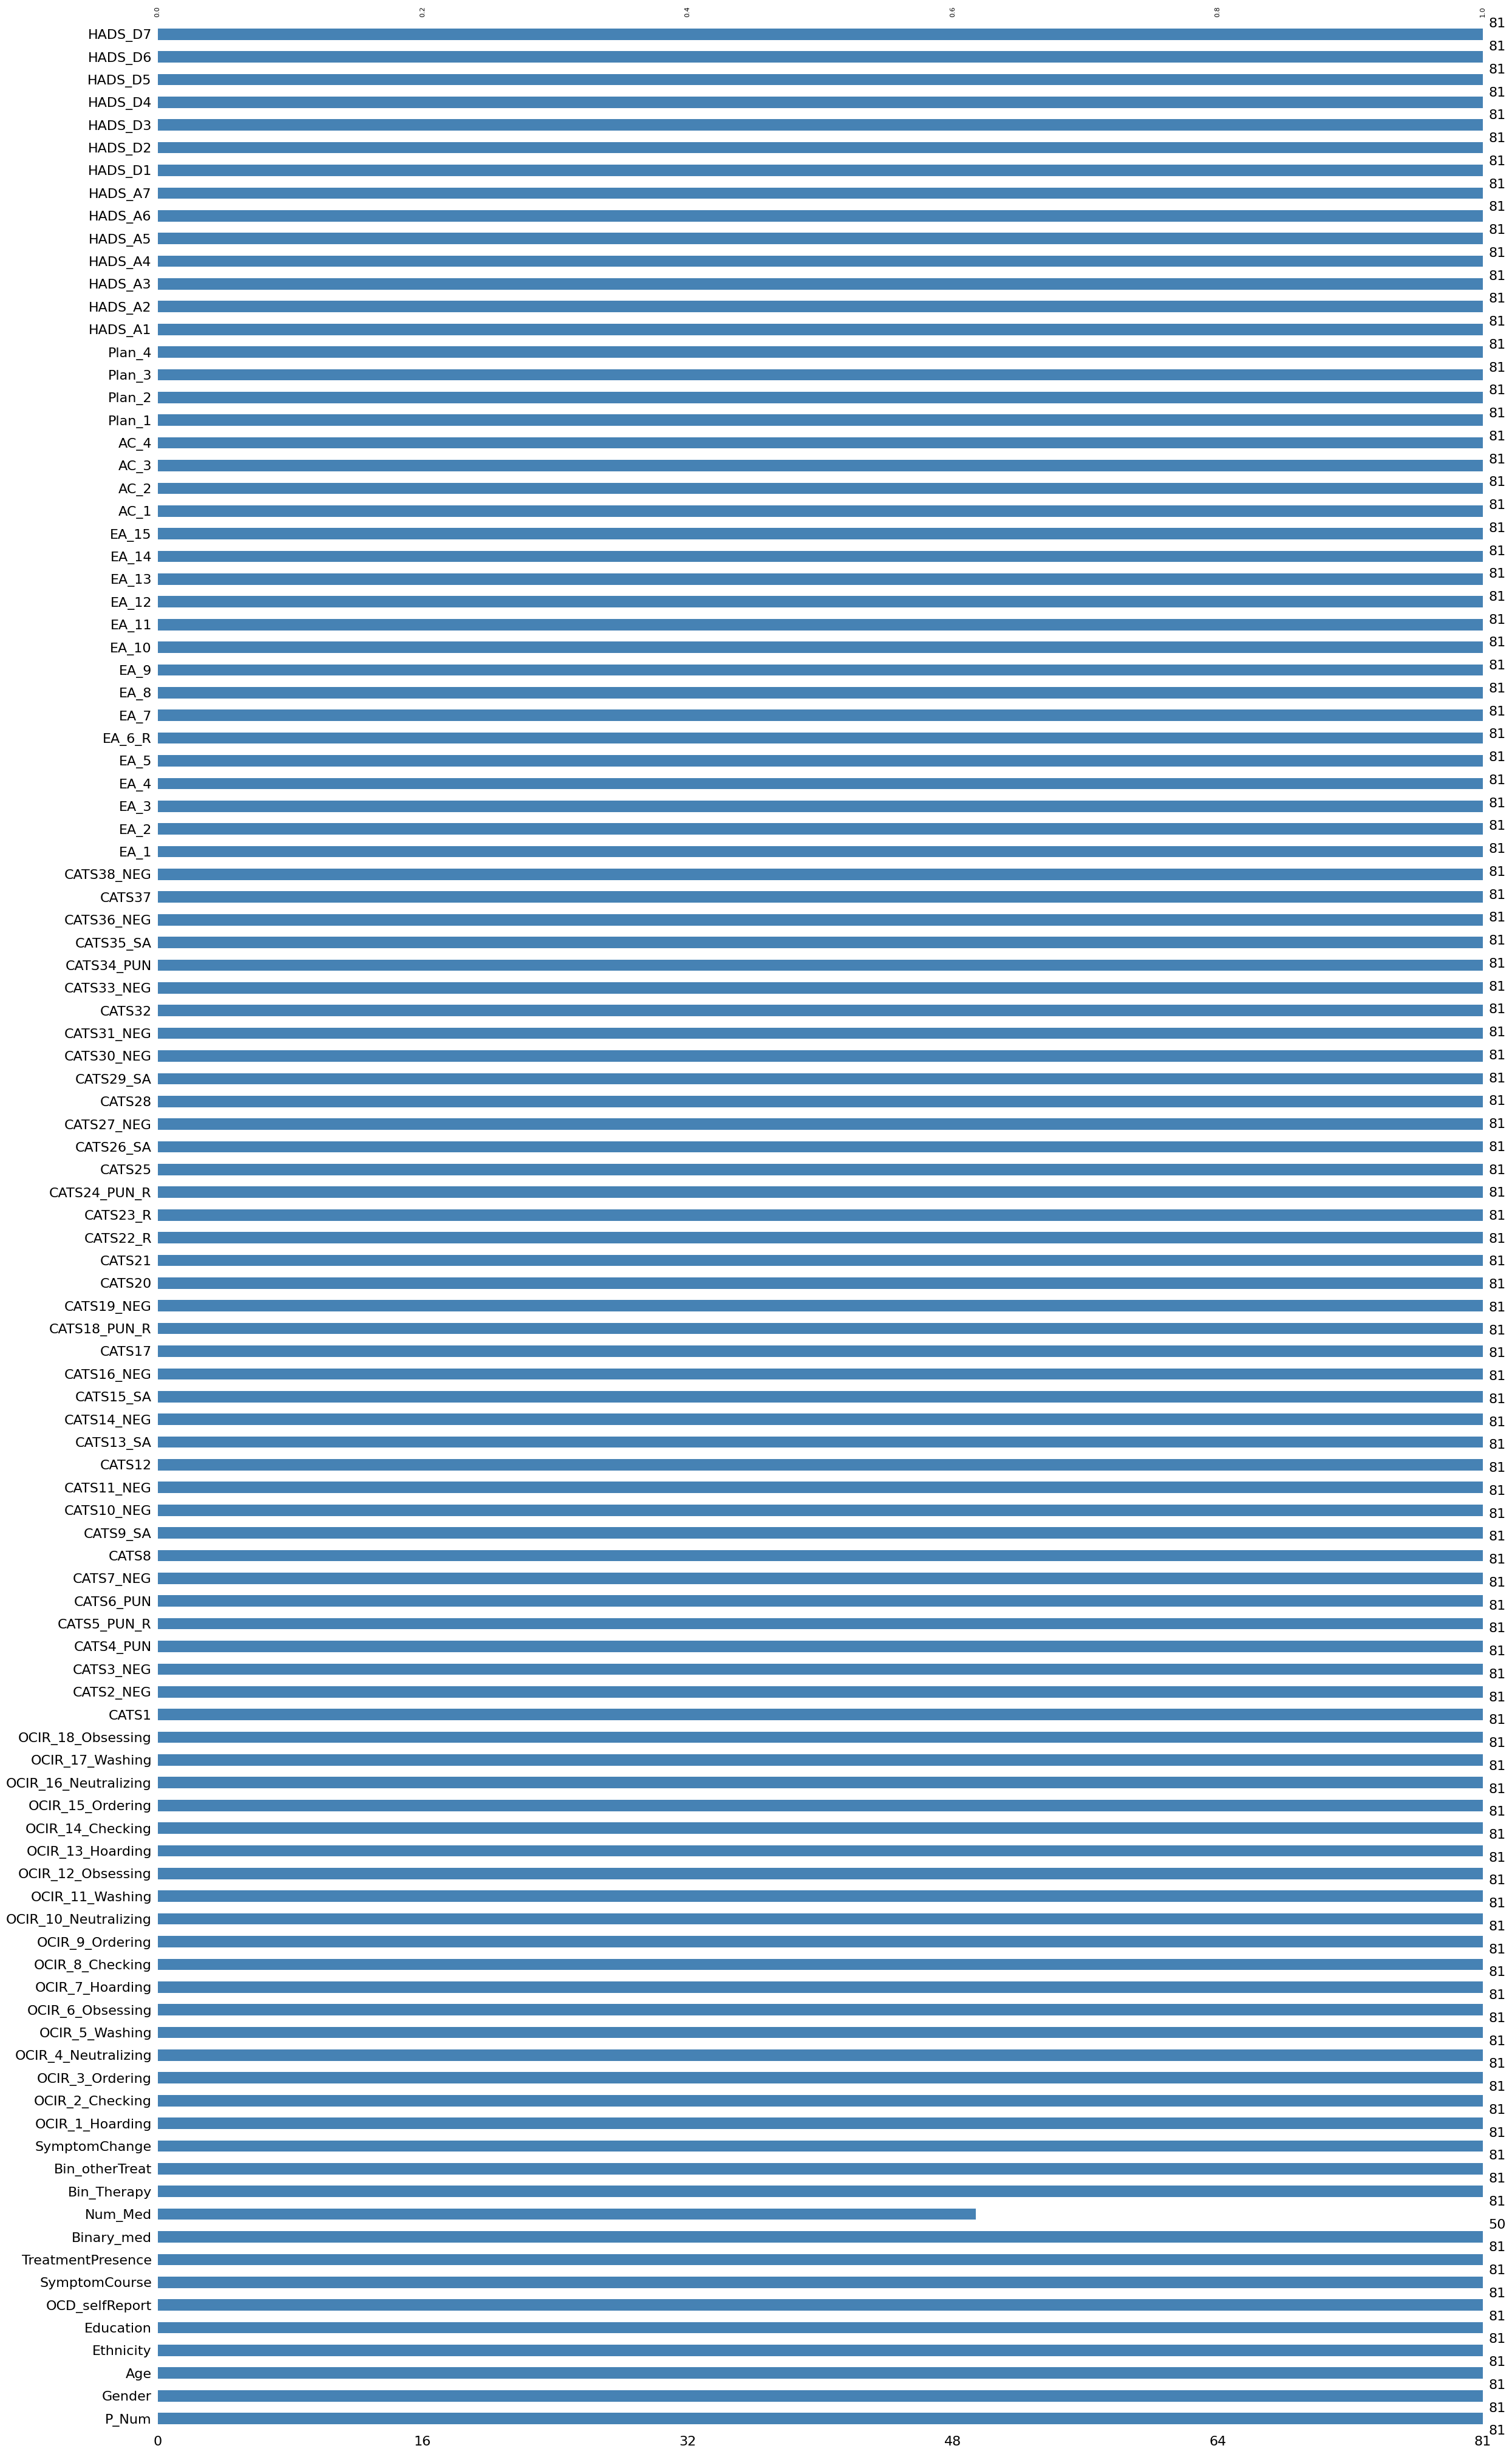

In [14]:
# Import and use it
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))  # wider figure
msno.bar(df_clean, color="steelblue")

plt.xticks(rotation=90, fontsize=8)  # rotate and make smaller
plt.tight_layout()
plt.show()

apparently individuals who filled the columns we care about the most are the same as individuals who who completed all questions, the only column that was not completely filled is the Num_med column so we will drop it  

In [15]:
df_clean.drop("Num_Med", axis=1, inplace=True)

C:\Users\ranee\AppData\Local\Temp\ipykernel_8616\3758844550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop("Num_Med", axis=1, inplace=True)


now there is one really important thing left to check, how many actually said they have OCD either diagnosed or not

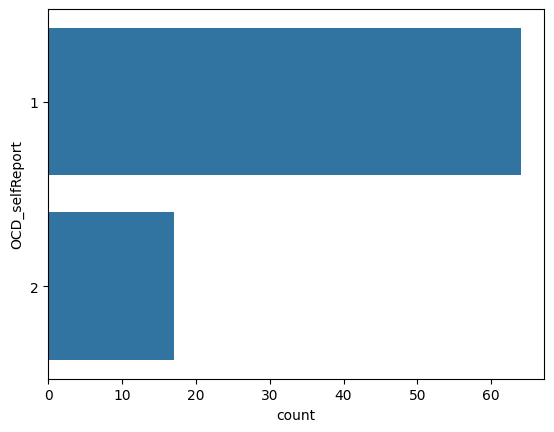

In [16]:
import seaborn as sns

sns.countplot(y="OCD_selfReport", data=df_clean)
plt.show()

according to the data dictionary that was provided in the website and I added it to the repository here 1 = Yes, diagnosed; 2 = Yes, but not diagnosed; 3 = No
we zero from category 3

now our two main goals are completed 
one: a completed and entirely filled data with no null values
two: only people with OCD


In [17]:
df_clean.shape[1]

105

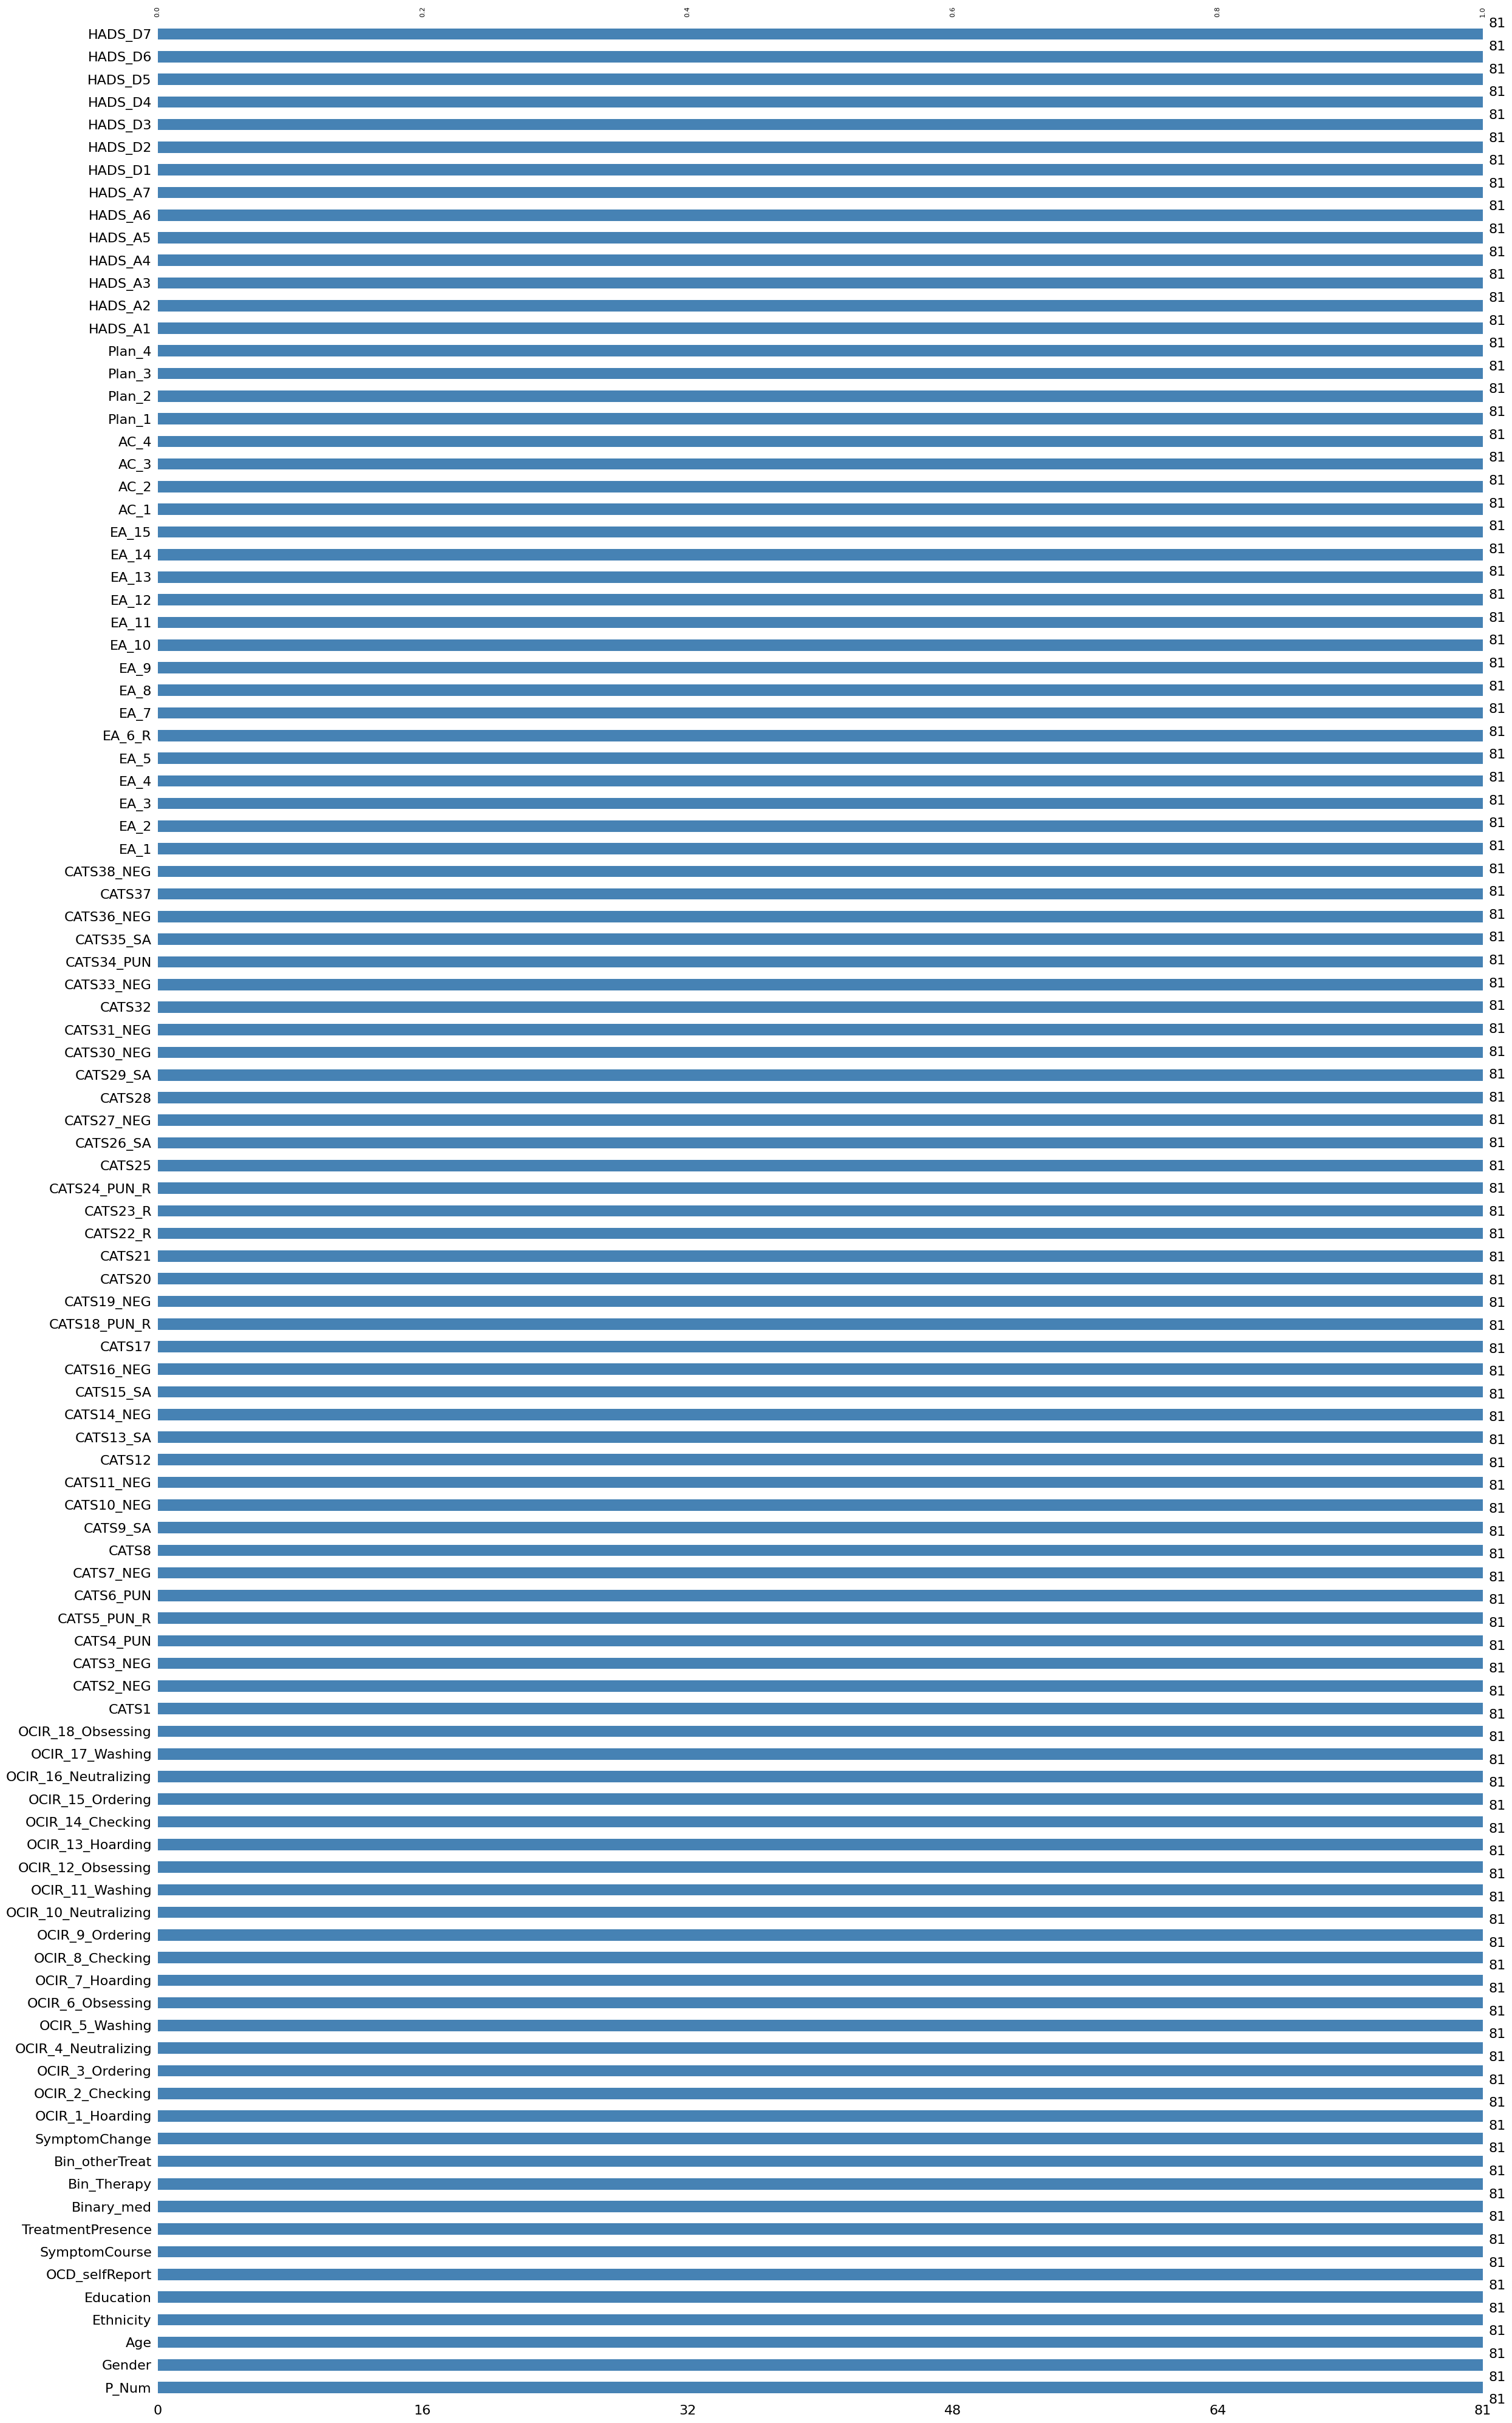

In [18]:
# Import and use it
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))  # wider figure
msno.bar(df_clean, color="steelblue")

plt.xticks(rotation=90, fontsize=8)  # rotate and make smaller
plt.tight_layout()
plt.show()

In [10]:
df_clean.to_csv(
    "../data/cleaned_data_one/cleaned_data_without_feature_engineering/cleaned_data_1.csv"
)